# <font face="times"><font size="6pt"><p style = 'text-align: center;'> The City University of New York, Queens College

<font face="times"><font size="6pt"><p style = 'text-align: center;'><b>Introduction to Computational Social Science</b><br/><br/>

<p style = 'text-align: center;'><font face="times"><b>Lesson 09 | Natural Language Processing I: Text Statistics</b><br/><br/>

<p style = 'text-align: center;'><font face="times"><b>10 Checkpoints</b><br/><br/>



***
***
# Begin Lesson 09
# Text as Data-An Introduction to Natural Language Processing (NLP)

NLP stands for Natual Language Processing and it involves a huge variety of tasks such as:
- Automatic summarization.
- Discourse analysis.
- Machine translation.
- Named entity recognition.
- Part-of-speech tagging.
- Parsing.
- Question answering.
- Relationship extraction.
- Sentiment analysis.
- Speech recognition.
- Topic segmentation.
- Word segmentation.
- Information retrieval.
- Information extraction.
- Speech processing.

The key idea is that there are times when we would much prefer to process a heap of text without having to read it ourselves. Reading is, of course, energy- and time-intensive. Reading the entire corpus of fiction written in English from the 15th century to the 18th century, for instance, would take years. But with NLP we can have a computer do the same thing in a relatively short time, letting us answer fascinating questions that would otherwise be out of reach.

Python is built in with a very mature regular expression library, which is the building block of natural language processing. Traditionally, in the Python ecosystem the Natural Language Processing Toolkit, abbreviated as `NLTK`, has been until recently the only working choice.

Natural Language Processing (NLP) is often taught at the academic level from the perspective of computational linguists. However, as social scientists, we have a richer view of the natural language world - unstructured data that by its very nature has latent information that is important to humans. NLP practioners have benefited from machine learning techniques to unlock meaning from large corpora, and we’ll explore how to do that particularly with Python and with the Natural Language Toolkit (NLTK). 

NLTK is an excellent library for machine-learning based NLP, written in Python by experts from both academia and industry. Python allows you to create rich data applications rapidly, iterating on hypotheses. The combination of Python + NLTK means that you can easily add language-aware data products to your larger analytical workflows and applications. 
    
**Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, see below.**

***
***

# Introduction to NLP with NLTK

## Quick Overview of NLTK
`NLTK` stands for the Natural Language Toolkit and it provides a combination of natural language corpora, lexical resources, and example grammars with language processing algorithms, methodologies and demonstrations for a very pythonic "batteries included" view of Natural Language Processing.   

As such, `NLTK` is perfect for researh driven (hypothesis driven) computational social science projects. Its suite of libraries includes:

- tokenization, stemming, and tagging
- chunking and parsing
- language modeling
- classification and clustering
- logical semantics

`NLTK` is also a useful pedagogical resource for learning NLP with Python and serves as a starting place for producing production grade code that requires natural language analysis. `NLTK` provides a variety of tools that can be used to explore the linguistic domain but is not a lightweight dependency that can be easily included in other workflows, especially those that require unit and integration testing or other build processes. This stems from the fact that `NLTK` includes a lot of added code but also a rich and complete library of corpora that power the built-in algorithms. 

***
## Installing NLTK

This notebook has a few dependencies, most of which can be installed via the python package manger - `pip` or using `conda`. Here, we're going to use `conda`. 

1. NLTK
2. The NLTK corpora 
3. The BeautifulSoup library
4. The gensim libary



If you're installing this with PythonAnywhere (or anywhere else, for that matter, like for your future jobs) then use the following in Python:

**Note:** These requirements may already be installed, in which case you should receive some sort of output like `"Requirement already satisifed:"`. 

In [1]:
!pip3.6 install --user gensim
!pip3.6 install --user nltk
!pip3.6 install --user beautifulsoup4

Looking in links: /usr/share/pip-wheels
Looking in links: /usr/share/pip-wheels
Looking in links: /usr/share/pip-wheels


Now, let's import some of the packages we just installed (e.g., nltk, gensim) and some others we've used (e.g., pandas).

In [2]:
import random
import nltk
import gensim
import numpy as np
import pandas as pd
import scipy

from nltk.stem.porter import *

Now that we've imported these modules, we need download the necessary resources for `NLTK`. 

Uncomment the commands below and run.

**Note:** This will likely take some time, especially if you're setting this up on your local machine or personal computer, depending on your internet speeds. 

In [3]:
nltk.download('punkt')
nltk.download('tagsets')
nltk.download('averaged_perceptron_tagger')
nltk.download('sinica_treebank')
nltk.download('reuters')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('brown')

[nltk_data] Downloading package punkt to /home/ahegu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package tagsets to /home/ahegu/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ahegu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package sinica_treebank to
[nltk_data]     /home/ahegu/nltk_data...
[nltk_data]   Package sinica_treebank is already up-to-date!
[nltk_data] Downloading package reuters to /home/ahegu/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ahegu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/ahegu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /home/a

True

***
***

## Preprocessing Text Data - Tokenization, Stemming, Lemmatization, and Stop Words

In English (and many other languages) - context indicate gender, tense, quantity, etc. but these subleties might not be necessary. It is helpful for many applications to normalize these word forms (especially applications like search) into some canonical word for further exploration. This is where stemming and lemmatization come in. 

***

## Tokenization

The fundamental "datum" for NLP is the token. Tokens are another way of saying terms and words that are made distinct by punctuation, capitalization, or verb conjugations (more on this in a bit). It is a necessary preprocessing step for NLP applications. Tokenization involves segmenting text into tokens. Let's look at the following string:

In [4]:
text = "Are you crazy? I don't know."

It often makes sense to force the text into lowercase. Recall from our first week that computers view "Crazy" as a different string from "crazy" and different still from "CrazY" due to the placement of the upper-case letters. If you want to count these as the same term, turning each of these strings into lowercase helps solve that problem.

Let's give that a try.

In [5]:
text = text.lower()

Let's see what the text looks like now.

In [6]:
text

"are you crazy? i don't know."

Before moving on, be aware that there are in fact scenarios where you might care about the difference between upper-case and lower-case spellings, and thus would **not** want to reduce text to lower-case in NLP work. In English, for instance, "China" has a different meaning than "china". Further, some languages like German use capitalization to indicate the difference between nouns and non-nouns that are spelled in the same manner. If you expect distinctions like these to matter in your corpora, it might be wise to leave the casing as-is, since you risk conflating the terms by reducing the text to lower-case.

Back to NLP! To work with our text, we need to split the sentence up into its tokens. A simple method is just to split based on white space. 

***Note*** that this doesn't work for many other languages (e.g., Japanese, Greek, Chinese). 

In [7]:
text.split()

['are', 'you', 'crazy?', 'i', "don't", 'know.']

We will now explore tokenization as provided by two NLP tools: `NLTK` and `gensim`. First, look at how `NLTK` tokenizes words:

In [8]:
nltk.word_tokenize(text)

['are', 'you', 'crazy', '?', 'i', 'do', "n't", 'know', '.']

The `nltk` package is great to use. Now, let's look at how `Gensim` is handling tokenization

In [9]:
list(gensim.utils.tokenize(text))

['are', 'you', 'crazy', 'i', 'don', 't', 'know']

Which one do you think worked better? As we'll see, we'll want to remove punctuation and filler words that offer little added meaning to our analyses (e.g., prepositions, articles, pronouns, etc.). NLTK happens to keep more of this information. Gensim, on the other hand, may have trouble disaggregating "don't" from "don" (e.g. Don Draper) after tokenization, depending on how we process the data (there are simple ways to deal with this).

One of the key takeaways on working text as data is that no one approach will be perfect. 

***
***

# Checkpoint 1 of 10
## Now you try!

### Make-up your own sentence and save it as `my_sentence`. 

### Be sure to include punctuation, random capitalization, etc. This isn't an English class, so no need to worry about proper grammar. 

### Change the text to lower case, convert the text to a list of strings based on the white spaces, and use `gensim` to tokenize it. 

In [10]:
my_sentence = "A Journey of thousand miles, begins at One'S feet?"

In [11]:
my_sentence = my_sentence.lower()

In [12]:
my_sentence

"a journey of thousand miles, begins at one's feet?"

In [13]:
my_sentence.split()

['a', 'journey', 'of', 'thousand', 'miles,', 'begins', 'at', "one's", 'feet?']

In [14]:
nltk.word_tokenize(my_sentence)

['a',
 'journey',
 'of',
 'thousand',
 'miles',
 ',',
 'begins',
 'at',
 'one',
 "'s",
 'feet',
 '?']

In [15]:
list(gensim.utils.tokenize(my_sentence))

['a', 'journey', 'of', 'thousand', 'miles', 'begins', 'at', 'one', 's', 'feet']

***
***

***
***

### Sidenote: Non-English and Non-Romanized Langauges

Working with text that is not in English and/or does not use the roman alphabet is common. These techniques are just as applicable, however our focus here will be English. Just to give an example though: 

In [16]:
sentence = "今天天氣如何?"

In [17]:
tokens = nltk.word_tokenize(sentence)
print(tokens)

['今天天氣如何', '?']


In [18]:
from nltk.corpus import sinica_treebank

In [19]:
sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

***
***

### Stemming

[Stemming](http://en.wikipedia.org/wiki/Stemming) chops off affixes to get the root stem of the word. It is the process of reducing a word to its base/stem/root form. Most stemmers are pretty basic and just chop off standard affixes indicating things like tense (e.g., "-ed") and possessive forms (e.g., "-'s"). For instance:

    running --> run
    flowers --> flower
    geese   --> geese 

Once our tokens are stemmed, we can rest easy knowing that *BuzzFeed* and *BuzzFeed's* are now being counted together as... *buzzfe*? Don't worry: although this may look weird, it's pretty standard behavior for stemmers and won't affect our analysis (much). We also (probably) won't show the stemmed words to users -- we'll normally just use them for internal analysis or indexing purposes.

There are several stemmers available:

    - Lancaster (English, newer and aggressive)
    - Porter (English, original stemmer)
    - Snowball (Many langauges, newest)


`NLTK` has several stemmers already for our use (listed above). Let's import them first and we can use them to stem a sentence.

In [20]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer

Let's stem the following sentence: 

"The women running in the fog passed bunnies working as computer scientists."

Let's use the `word_tokenize` function form `NLTK` and then save these tokenized words in a `list` structure. 

In [21]:
text = list(nltk.word_tokenize("The women running in the fog passed bunnies working as computer scientists."))

Now, let's initialize the three different stemmers that we have at our disposal. 

Each has their strengths and weaknesses, so let's test them all and see how they each work.

In [22]:
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

Here, we have a for loop that will use these three stemmers - snowball, lancaster, and porter - to stem our above list. It will print out how our previous sentence is stemmed using these three different approaches. 

In [23]:
for stemmer in (snowball, lancaster, porter):
    stemmed_text = [stemmer.stem(t) for t in text]
    print(" ".join(stemmed_text))

the women run in the fog pass bunni work as comput scientist .
the wom run in the fog pass bunny work as comput sci .
the women run in the fog pass bunni work as comput scientist .


The `snowball` stemmer produced the sentence as: "the women run in the fog pass bunni work as comput scientist ."

The `lancaster` stemmer produced: "the wom run in the fog pass bunny work as comput sci ."

The `porter` stemmer produced: "the women run in the fog pass bunni work as comput scientist ."

As you can surmise, no one stemmer is going to be perfect.

***
***

# Checkpoint 2 of 10
## Now you try!

### Come up with another sentence, different than the one you used in the first checkpoint. 

### Follow the same procedures here and stem the sentence using all three techniques: `snowball`, `lancaster`, and `porter`. 
### Print out the stemmed sentences. What one did the best? How do they differ?

In [24]:
my_sentence_2 = list(nltk.word_tokenize("The longer the explanation the bigger the lie"))

In [25]:
snowball = SnowballStemmer('english')
lancaster = LancasterStemmer()
porter = PorterStemmer()

In [26]:
for stemmer in (snowball, lancaster, porter):
    stemmed_my_sentence_2 = [stemmer.stem(t) for t in my_sentence_2]
    print(" ".join(stemmed_my_sentence_2))

the longer the explan the bigger the lie
the long the expl the big the lie
the longer the explan the bigger the lie


In [27]:
# In this case I think Porter stemmer did the best. There is very little difference
# between Lancaster and Snowball steamers

***
***

***
***

### Lemmatization

Although the stemmer very helpfully chopped off pesky affixes (and made everything lowercase to boot), there are some word forms that give stemmers indigestion, especially *irregular* words. While the process of stemming typically involves rule-based methods of stripping affixes (making them small & fast), **lemmatization** involves dictionary-based methods to derive the canonical forms (i.e., *lemmas*) of words. For example, *run*, *runs*, *ran*, and *running* all correspond to the lemma *run*. 

    women   --> woman
    foxes   --> fox
    sheep   --> sheep
    
However, lemmatizers are generally big, slow, and brittle due to the nature of the dictionary-based methods, so you'll only want to use them when necessary.

The example below compares the output of the Snowball stemmer with the WordNet lemmatizer (also distributed with NLTK). Notice that the lemmatizer correctly converts *women* into *woman*, while the stemmer turns *lying* into *lie*. Additionally, both replace *eyes* with *eye*, but neither of them properly transforms *told* into *tell*.

In [28]:
temp_sent = "Several people told me I have an amazing voice."

Now, let's establish the lemmatizer with one in the `NLTK` toolkit called `WordNetLemmatizer()`. First import it, and then set it up as `lemmatizer`.

In [29]:
from nltk.stem.wordnet import WordNetLemmatizer

In [30]:
lemmatizer = nltk.WordNetLemmatizer()

In [31]:
print([lemmatizer.lemmatize(t) for t in nltk.word_tokenize(temp_sent)])

['Several', 'people', 'told', 'me', 'I', 'have', 'an', 'amazing', 'voice', '.']


Let's compare this to one of the stemmers, let's say the `Snowball` stemmer.

In [32]:
print([snowball.stem(t) for t in nltk.word_tokenize(temp_sent)])

['sever', 'peopl', 'told', 'me', 'i', 'have', 'an', 'amaz', 'voic', '.']


As you can see, the stemmer does a much better job than the lemmatizer. 

Again, there's no one silver bullet that will always work perfectly. 

***
***

# Checkpoint 3 of 10
## Now you try!

### Use the sentence you came up with for the second checkpoint and use the lemmatizer. How did the lemmatize method do compared to the stemming?

In [33]:
my_sentence_3 = "The longer the explanation the bigger the lie."

In [34]:
lemmatizer = nltk.WordNetLemmatizer()

In [35]:
print([lemmatizer.lemmatize(t) for t in nltk.word_tokenize(my_sentence_3)])

['The', 'longer', 'the', 'explanation', 'the', 'bigger', 'the', 'lie', '.']


In [36]:
print([snowball.stem(t) for t in nltk.word_tokenize(my_sentence_3)])

['the', 'longer', 'the', 'explan', 'the', 'bigger', 'the', 'lie', '.']


In [37]:
# The stemmer does a better job than the lemmatizer

***
***

***
***

### Stop Words and Filtering Out Punctuation

Many extremely common words which would appear to be of little value are excluded from the vocabulary entirely. These words include conjunctions (e.g., and, but, or, etc.) prepositions (e.g., between, under, around, etc.), articles (e.g., the, an, etc.), pronouns (e.g., him, her, they, etc.), etc. As you may have noticed in the above examples, we included them in our analyses. 

They are called [*stop words*](http://en.wikipedia.org/wiki/Stop_words). What we need to do is filter them out in order to focus on just the important material.

While there is no single, definitive list of stop words, but `NLTK` provides a decent start. Let's load it up and take a look at what we get:

In [38]:
sorted(nltk.corpus.stopwords.words('english'))[:25]

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both']

In [39]:
sorted(nltk.corpus.stopwords.words('english'))

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

Let's use the stemming code from above, but now let's filter out these stopwords.

In [40]:
print([snowball.stem(t) for t in nltk.word_tokenize(temp_sent) if t not in nltk.corpus.stopwords.words('english')])

['sever', 'peopl', 'told', 'i', 'amaz', 'voic', '.']


When we compare it to the original, we can see that we've removed some stopwords:

In [41]:
print([snowball.stem(t) for t in nltk.word_tokenize(temp_sent)])

['sever', 'peopl', 'told', 'me', 'i', 'have', 'an', 'amaz', 'voic', '.']


***
***

# Checkpoint 4 of 10

## Now you try!

###  Use the sentence you used in the second and third checkpoints and use list comprehension (e.g., `[x for x in some_list]`) to remove stop words from your sentence. 

### DO NOT LEMMATIZE OR STEM HERE, AS SHOWN IN THE ABOVE EXAMPLE! Just remove the stopwords. 

In [42]:
my_sentence_4 = "The longer the explanation the bigger the lie."

In [43]:
print([(t) for t in nltk.word_tokenize(my_sentence_4) if t not in nltk.corpus.stopwords.words('english')])

['The', 'longer', 'explanation', 'bigger', 'lie', '.']


***
***

***

### Punctuation Removal 

Finally, there's one last issue: punctuation. As you can see from above, a period is being considered a token. You might have also noticed that apostrophes were also being included after tokenization, stemming, and/or lemminitization. 

To address this, let's use the `string` package to remove them. First, import the module.

In [44]:
import string

Now, let's get the punctuations we want to remove and save it as `punctuation`.

In [45]:
punctuation = string.punctuation

Now, let's see what punctuation is included and will subsequently be removed:

In [46]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

This is, in fact, one large string of all of the different punctuations we would want to strip away from any token and sentence. The great thing about `Python` is that we can easily test if a token is in this string.

Let's add to our stemmer/stopword code above, and add in a second if statement to stop tokens that are in the punctuation list. 

In [47]:
print([snowball.stem(t) for t in nltk.word_tokenize(temp_sent) if t not in punctuation and t not in nltk.corpus.stopwords.words('english')])

['sever', 'peopl', 'told', 'i', 'amaz', 'voic']


Comparing the above output to what we were getting earlier, we now removed the period. 

***
***

# Checkpoint 5 of 10

## Now you try!

###  Use the sentence you used in the second, third, and fourth checkpoints and use list comprehension (e.g., `[x for x in some_list]`) to remove punctuation from your sentence. 

### DO NOT LEMMATIZE, STEM, or REMOVE STOP WORDS HERE, AS SHOWN IN THE ABOVE EXAMPLE! Just remove punctuation. 

In [48]:
my_sentence_5 = "The longer the explanation, the bigger the lie."

In [49]:
print([(t) for t in nltk.word_tokenize(my_sentence_5) if t not in punctuation])

['The', 'longer', 'the', 'explanation', 'the', 'bigger', 'the', 'lie']


***
***

***
***

# Bringing It All Together

Typical normalization of text for use as features in machine learning models looks something like this:

In [50]:
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation #This is from the module string

Below, I defined a function called `normalize` that takes in text as one long string. It first tokenizes and lemmatizes it; and then it removes stopwords and punctuation. 

It uses `nltk` to go break up the sentence into tokens and uses a for loop to process each token.

In [51]:
def normalize(text):
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            yield token

Let's test it out with a simple sentence

In [52]:
print(list(normalize("The eagle flies at midnight.")))

['eagle', 'fly', 'midnight']


# Checkpoint 6 of 10

## Now you try!

### Write a new sentence and save it as a string. 

### Use the `normalize()` function I wrote and use it to tokenize, lemmatize, and remove stopwords and punctuation. 
### Print out the output, but be sure to capture the output as a `list()`, as the example shows. 

In [53]:
lemmatizer  = WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation #This is from the module string

In [54]:
def normalize(text):
    for token in nltk.word_tokenize(text):
        token = token.lower()
        token = lemmatizer.lemmatize(token)
        if token not in stopwords and token not in punctuation:
            yield token

In [55]:
print(list(normalize("A fall into a pit, a gain in your wit.")))

['fall', 'pit', 'gain', 'wit']


***
***

***
***

## Frequency Counts

Here's a little secret: much of NLP (and data science, for that matter) boils down to counting things. 

If you've got a bunch of data that needs *analyzin'* but you don't know where to start, counting things is usually a good place to begin. Sure, you'll need to figure out exactly what you want to count, how to count it, and what to do with the counts, but if you're lost and don't know what to do, **just start counting**.

`NLTK` provides two very excellent classes to enable these frequency analyses:

- `FreqDist`
- `ConditionalFreqDist` 

And these two classes serve as the foundation for most of the analyses that we will conduct.

Perhaps we'd like to begin (as is often the case in NLP) by examining the words that appear in our document. To do that, we'll first need to tokenize the text string into discrete words. Since we're working with English, this isn't so bad, but if we were working with a non-whitespace-delimited language like Chinese, Japanese, or Korean, it would be much more difficult, as discussed above.

In the code snippet below, we're using two of NLTK's tokenize methods to first chop up the article text into sentences, and then each sentence into individual words. (Technically, we didn't need to use <code>sent_tokenize()</code>, but if we only used <code>word_tokenize()</code> alone, we'd see a bunch of extraneous sentence-final punctuation in our output.) 

By printing each token alphabetically, along with a count of the number of times it appeared in the text, we can see the results of the tokenization. Notice that the output contains some punctuation & numbers, hasn't been loweredcased, and counts *BuzzFeed* and *BuzzFeed's* separately. We'll tackle some of those issues next.

Let's begin with a longer string, the opening of a "Tale of Two Cities" by Charles Dickens:

`It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way—in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.`

- `sent_tokenize`: This tokenizer divides a text (e.g., text from a document or a paragraph) into a list made up of sentences (i.e., sent_ == 'sentence'). 
    
       
- `word_tokenize`: This tokenizer uses regular expressions to tokenize text as in Penn Treebank. It assumes that the text has already been segmented into sentences, e.g. using ``sent_tokenize()``.
    


In [56]:
text = 'It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way—in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.'

In [57]:
tokens = [word for sentence in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sentence.lower()) if word not in stopwords and word not in punctuation]

Let's see what this looks like.

In [58]:
print(tokens)

['best', 'times', 'worst', 'times', 'age', 'wisdom', 'age', 'foolishness', 'epoch', 'belief', 'epoch', 'incredulity', 'season', 'light', 'season', 'darkness', 'spring', 'hope', 'winter', 'despair', 'everything', 'us', 'nothing', 'us', 'going', 'direct', 'heaven', 'going', 'direct', 'way—in', 'short', 'period', 'far', 'like', 'present', 'period', 'noisiest', 'authorities', 'insisted', 'received', 'good', 'evil', 'superlative', 'degree', 'comparison']


Now that we have tokenized this long string, let's get a frequency count of how often each token occurs. 

This is going to take a few steps. First we need the unique list of tokens. We can do this with the code 

`set(tokens)`

Let's look at these tokens alphabetically, say the first 30. We don't need to look at them alphabetically; there are lots of ways to look at which terms happen more frequently. Here, I choose to look at it this way as just one helpful way to explore a corpus. 

We can do so using `sorted()`, which will sort this list of tokens.

We can pass in each individual token from this unique list back into `tokens` to get its count. In other words, let's create a for loop that will go through each of these unique tokens and return how often it occurs in this text.  

In [59]:
for individual_token in sorted(set(tokens)):
    print(individual_token + ' | Count: ' + str(tokens.count(individual_token)))

age | Count: 2
authorities | Count: 1
belief | Count: 1
best | Count: 1
comparison | Count: 1
darkness | Count: 1
degree | Count: 1
despair | Count: 1
direct | Count: 2
epoch | Count: 2
everything | Count: 1
evil | Count: 1
far | Count: 1
foolishness | Count: 1
going | Count: 2
good | Count: 1
heaven | Count: 1
hope | Count: 1
incredulity | Count: 1
insisted | Count: 1
light | Count: 1
like | Count: 1
noisiest | Count: 1
nothing | Count: 1
period | Count: 2
present | Count: 1
received | Count: 1
season | Count: 2
short | Count: 1
spring | Count: 1
superlative | Count: 1
times | Count: 2
us | Count: 2
way—in | Count: 1
winter | Count: 1
wisdom | Count: 1
worst | Count: 1


Thus far, we've been working with lists of tokens that we're manually sorting, uniquifying, and counting -- all of which can get to be a bit cumbersome. Fortunately, NLTK provides a data structure called <code>FreqDist</code> that makes it more convenient to work with these kinds of frequency distributions. The code snippet below builds a <code>FreqDist</code> from our list of stemmed tokens, and then displays the top 25 tokens appearing most frequently in the text of our article.

In [60]:
fdist  = nltk.FreqDist(tokens)

Here, `fdist` is a special `dictionary` with value-key pairing. Let's use a for loop and see what's inside. 

To do so, let's use the `items()` method to extract the value-key pairs and turn it into a list. (This makes dealing with it much easier.) Now, let's loop through each item and print out both the term and the frequency count.

In [61]:
for term, count in list(fdist.items()):
    print(term + " " + str(count))

best 1
times 2
worst 1
age 2
wisdom 1
foolishness 1
epoch 2
belief 1
incredulity 1
season 2
light 1
darkness 1
spring 1
hope 1
winter 1
despair 1
everything 1
us 2
nothing 1
going 2
direct 2
heaven 1
way—in 1
short 1
period 2
far 1
like 1
present 1
noisiest 1
authorities 1
insisted 1
received 1
good 1
evil 1
superlative 1
degree 1
comparison 1


So this good. However, this text is short. If it were longer, we may not be able to discern what terms are more frequent. Thankfully, `fdist` has a method called `.most_common()` that will tell us the "n" most common terms found. 

In [62]:
print(fdist.most_common(20))

[('times', 2), ('age', 2), ('epoch', 2), ('season', 2), ('us', 2), ('going', 2), ('direct', 2), ('period', 2), ('best', 1), ('worst', 1), ('wisdom', 1), ('foolishness', 1), ('belief', 1), ('incredulity', 1), ('light', 1), ('darkness', 1), ('spring', 1), ('hope', 1), ('winter', 1), ('despair', 1)]


***
***

# Checkpoint 7 of 10
## Now you try!

### Copy and paste a paragraph from a news article (e.g., CNN, BBC, etc.). Save this paragraph as a string called `my_news_article`. 

### Remove stop words and punctuation and tokenzie the terms in the sentence and calculate the frequency distribution. 

### What are the 10 most common terms in your paragraph?

In [63]:
my_news_article = "India is on pause. The streets are empty, the skies vacant, railways silent. Nearly everything is shut. People have been asked to stay at home. Time stands still. But the eerie stillness of a 21-day lockdown of the world's second most populous country to prevent the spread of coronavirus is a deceptive exterior to the chaos brewing within. As India ended the second day of this unprecedented hiatus from life and work, reports and videos turned up showing how potentially disruptive this move could be in a chaotic, under-resourced democracy. It's early days yet, and things may improve. But how India copes with the economic and social fallout of its biggest ever disruption, possibly since the bloody partition at the end of British rule in 1947, will be watched keenly. It will also be the biggest test for any government since the founding of the republic."

In [64]:
tokens_2 = [word for sentence in nltk.sent_tokenize(my_news_article) for word in nltk.word_tokenize(sentence.lower()) if word not in stopwords and word not in punctuation]

In [65]:
print(tokens_2)

['india', 'pause', 'streets', 'empty', 'skies', 'vacant', 'railways', 'silent', 'nearly', 'everything', 'shut', 'people', 'asked', 'stay', 'home', 'time', 'stands', 'still', 'eerie', 'stillness', '21-day', 'lockdown', 'world', "'s", 'second', 'populous', 'country', 'prevent', 'spread', 'coronavirus', 'deceptive', 'exterior', 'chaos', 'brewing', 'within', 'india', 'ended', 'second', 'day', 'unprecedented', 'hiatus', 'life', 'work', 'reports', 'videos', 'turned', 'showing', 'potentially', 'disruptive', 'move', 'could', 'chaotic', 'under-resourced', 'democracy', "'s", 'early', 'days', 'yet', 'things', 'may', 'improve', 'india', 'copes', 'economic', 'social', 'fallout', 'biggest', 'ever', 'disruption', 'possibly', 'since', 'bloody', 'partition', 'end', 'british', 'rule', '1947', 'watched', 'keenly', 'also', 'biggest', 'test', 'government', 'since', 'founding', 'republic']


In [66]:
for individual_token in sorted(set(tokens_2)):
    print(individual_token + ' | Count: ' + str(tokens.count(individual_token)))

's | Count: 0
1947 | Count: 0
21-day | Count: 0
also | Count: 0
asked | Count: 0
biggest | Count: 0
bloody | Count: 0
brewing | Count: 0
british | Count: 0
chaos | Count: 0
chaotic | Count: 0
copes | Count: 0
coronavirus | Count: 0
could | Count: 0
country | Count: 0
day | Count: 0
days | Count: 0
deceptive | Count: 0
democracy | Count: 0
disruption | Count: 0
disruptive | Count: 0
early | Count: 0
economic | Count: 0
eerie | Count: 0
empty | Count: 0
end | Count: 0
ended | Count: 0
ever | Count: 0
everything | Count: 1
exterior | Count: 0
fallout | Count: 0
founding | Count: 0
government | Count: 0
hiatus | Count: 0
home | Count: 0
improve | Count: 0
india | Count: 0
keenly | Count: 0
life | Count: 0
lockdown | Count: 0
may | Count: 0
move | Count: 0
nearly | Count: 0
partition | Count: 0
pause | Count: 0
people | Count: 0
populous | Count: 0
possibly | Count: 0
potentially | Count: 0
prevent | Count: 0
railways | Count: 0
reports | Count: 0
republic | Count: 0
rule | Count: 0
second 

In [67]:
fdist_2  = nltk.FreqDist(tokens_2)

In [68]:
for term, count in list(fdist_2.items()):
    print(term + " " + str(count))

india 3
pause 1
streets 1
empty 1
skies 1
vacant 1
railways 1
silent 1
nearly 1
everything 1
shut 1
people 1
asked 1
stay 1
home 1
time 1
stands 1
still 1
eerie 1
stillness 1
21-day 1
lockdown 1
world 1
's 2
second 2
populous 1
country 1
prevent 1
spread 1
coronavirus 1
deceptive 1
exterior 1
chaos 1
brewing 1
within 1
ended 1
day 1
unprecedented 1
hiatus 1
life 1
work 1
reports 1
videos 1
turned 1
showing 1
potentially 1
disruptive 1
move 1
could 1
chaotic 1
under-resourced 1
democracy 1
early 1
days 1
yet 1
things 1
may 1
improve 1
copes 1
economic 1
social 1
fallout 1
biggest 2
ever 1
disruption 1
possibly 1
since 2
bloody 1
partition 1
end 1
british 1
rule 1
1947 1
watched 1
keenly 1
also 1
test 1
government 1
founding 1
republic 1


In [69]:
print(fdist_2.most_common(10))

[('india', 3), ("'s", 2), ('second', 2), ('biggest', 2), ('since', 2), ('pause', 1), ('streets', 1), ('empty', 1), ('skies', 1), ('vacant', 1)]


***
***

***

## Scaling Up

Let's test this out with a much bigger corpus. Included with `nltk` is a corpus of news articles from Reuters, an international news agency. Let's define this corpus to a variable called `reuters`. 

In [70]:
reuters = nltk.corpus.reuters # Corpus of news articles

Now, let's convert the words in this corpus into counts, just as we did before. 

***Note:*** This may take a few moments to run.

In [71]:
counts  = nltk.FreqDist(reuters.words())

With counts, we can get the following descriptive features of the `reuters` corpus: 

- The vocabulary (unique words)
- The count of words
- The lexical diversity (the ratio of word count to vocabulary)

In [72]:
vocab   = len(counts.keys()) #Number of unique terms
words   = sum(counts.values()) #Total count of the words
lexdiv  = float(words) / float(vocab) #Lexcial diversity

Now, let's see what the `reuters` corpus looks like. 

In [73]:
print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 41600 types and 1720901 tokens for a lexical diversity of 41.368


Just as before, we can calculate the n most common tokens in the corpus. Let's look at the n=40 most.

In [74]:
print(counts.most_common(40))  # The n most common tokens in the corpus

[('.', 94687), (',', 72360), ('the', 58251), ('of', 35979), ('to', 34035), ('in', 26478), ('said', 25224), ('and', 25043), ('a', 23492), ('mln', 18037), ('vs', 14120), ('-', 13705), ('for', 12785), ('dlrs', 11730), ("'", 11272), ('The', 10968), ('000', 10277), ('1', 9977), ('s', 9298), ('pct', 9093), ('it', 8842), (';', 8762), ('&', 8698), ('lt', 8694), ('on', 8556), ('from', 7986), ('cts', 7953), ('is', 7580), ('>', 7449), ('that', 7377), ('its', 7265), ('by', 6872), ('"', 6816), ('at', 6537), ('2', 6528), ('U', 6388), ('S', 6382), ('year', 6310), ('be', 6288), ('with', 5945)]


We can also find the most frequent token using `.max()`

In [75]:
print(counts.max()) # The most frequent token in the corpus

.


We can also calculate what percentage of the entire corpus a particular term is. For instance, let's consider "year":

In [76]:
counts.freq('year') * 100 # percentage of the corpus for this token

0.3666683905698236

The word "year" is only 0.367% of the total corpus. In other words, it's fairly small.

Let's test this out, for the 20 most common tokens (see above), let's see what the percentage they make up in the corpus. 

(Here, I'm going to use the function `round()` to round it off to two significant digits.)

In [77]:
for most_common, count_ in counts.most_common(20):
    print("Token " + most_common + " is " + str(round(counts.freq(most_common) * 100,2)) + "% of the corpus.")

Token . is 5.5% of the corpus.
Token , is 4.2% of the corpus.
Token the is 3.38% of the corpus.
Token of is 2.09% of the corpus.
Token to is 1.98% of the corpus.
Token in is 1.54% of the corpus.
Token said is 1.47% of the corpus.
Token and is 1.46% of the corpus.
Token a is 1.37% of the corpus.
Token mln is 1.05% of the corpus.
Token vs is 0.82% of the corpus.
Token - is 0.8% of the corpus.
Token for is 0.74% of the corpus.
Token dlrs is 0.68% of the corpus.
Token ' is 0.66% of the corpus.
Token The is 0.64% of the corpus.
Token 000 is 0.6% of the corpus.
Token 1 is 0.58% of the corpus.
Token s is 0.54% of the corpus.
Token pct is 0.53% of the corpus.


We can also plot these counts as well with the built-in method `.plot()`.

**Note:** You'll also need to use `%matplotlib inline` in order to show the plot. 

In [78]:
%matplotlib inline 

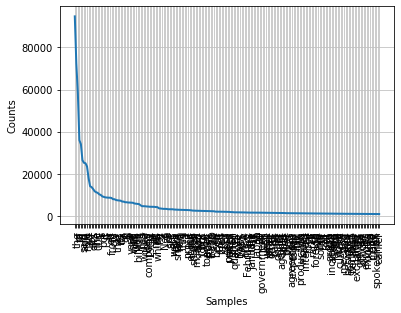

In [79]:
counts.plot(200, cumulative=False)

***
***

# Checkpoint 8 of 10
## Now you try!

### Read in another sample corpus from `nltk`. Let's use the corpus of U.S. president "State of the Union" speeches. 

### First, download this corpus:

```Python 
    nltk.download('state_union')
```

### Then, import the corpus:

```Python
    from nltk.corpus import state_union
```

### Calculate its lexical diversity. Then, calculate what percentage of how frequently the most popular term occurs in this corpus. 

In [80]:
nltk.download('state_union')

[nltk_data] Downloading package state_union to
[nltk_data]     /home/ahegu/nltk_data...
[nltk_data]   Package state_union is already up-to-date!


True

In [81]:
from nltk.corpus import state_union

In [82]:
state_union = nltk.corpus.state_union # Corpus of news articles

In [83]:
counts_2  = nltk.FreqDist(state_union.words())

In [84]:
vocab   = len(counts_2.keys()) #Number of unique terms
words   = sum(counts_2.values()) #Total count of the words
lexdiv  = float(words) / float(vocab) #Lexcial diversity

In [85]:
print("Corpus has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Corpus has 14591 types and 399822 tokens for a lexical diversity of 27.402


In [86]:
print(counts_2.most_common(20))  # The n most common tokens in the corpus

[('the', 19191), ('.', 17501), (',', 17484), ('of', 12854), ('to', 11868), ('and', 11748), ('in', 6936), ('a', 5837), ('our', 5141), ('we', 4338), ('that', 4309), ('for', 4070), ('is', 3621), ('I', 3394), ('will', 2959), ("'", 2620), ('have', 2486), ('be', 2481), ('this', 2323), ('are', 2273)]


In [87]:
print(counts_2.max()) # The most frequent token in the corpus

the


In [88]:
for most_common, count_ in counts_2.most_common(10):
    print("Token " + most_common + " is " + str(round(counts_2.freq(most_common) * 100,2)) + "% of the corpus.")

Token the is 4.8% of the corpus.
Token . is 4.38% of the corpus.
Token , is 4.37% of the corpus.
Token of is 3.21% of the corpus.
Token to is 2.97% of the corpus.
Token and is 2.94% of the corpus.
Token in is 1.73% of the corpus.
Token a is 1.46% of the corpus.
Token our is 1.29% of the corpus.
Token we is 1.08% of the corpus.


In [89]:
%matplotlib inline 

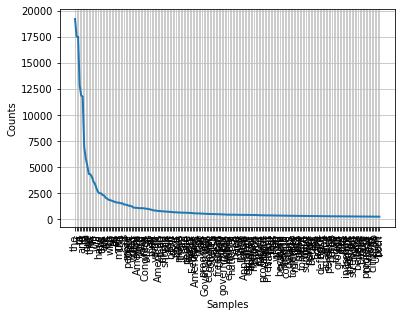

In [90]:
counts_2.plot(200, cumulative=False)

***
***

***

## N-Grams

Most of the work we've seen so far only considers single terms. However, terms have modifiers like adjectives and adverbs (e.g., 'American history' or 'wonderfully dull'). Seperating terms individually ignores the specific order that terms appear in, which potentially loses their meaning. 

To that end, we often use n-grams. They are simply all combinations of adjacent terms that you can find in your source text. Here, N is the number of terms that are adjacent and combined together to form one term. As an example, "hello, world!" contains the following:
 - Two unigrams (N=1): (1) Hello (2) World 
 - One bigram (N=2): (1) Hello World 
 
Or, consider the sentence "My name is Charlie Gomez": it consists of 
 - Five uni-grams (N=1):(1) My, (2) Name, (3) Is, (4) Charile, (5) Gomez 
 - Four bi-grams (N=2): (1) My Name, (2) Name Is, (3) Is Charlie, (4) Charlie Gomez
 - Three tri-grams (N=3): (1) My Name Is, (2) Name Is Charlie, (3) Is Charlie Gomez 
 - Two quad-grams (N=4): My Name Is Charlie, (2) Name Is Charlie Gomez
 - One quint-gram (N=5): My Name Is Charlie Gomez

The basic point of n-grams is that they capture the language structure from a statistical point of view, like what term is likely to follow the given one. The longer the n-gram (the higher the N), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

Thankfully, `NLTK` takes care of this for us. 

In [91]:
from nltk.util import ngrams

Let's take our test from before and find all of the bi-grams (N=2). This is accomplished with the `ngrams()` function. 

We need to split the text into a list of terms (i.e., `text.split()`) and pass in N that we want; here we want N=2. 

In [92]:
bi_freq = nltk.FreqDist(ngrams(text.split(),2))

Now, let's take a look. 

In [93]:
bi_freq

FreqDist({('was', 'the'): 10, ('it', 'was'): 9, ('of', 'times,'): 2, ('times,', 'it'): 2, ('the', 'age'): 2, ('age', 'of'): 2, ('the', 'epoch'): 2, ('epoch', 'of'): 2, ('the', 'season'): 2, ('season', 'of'): 2, ...})

A lot of this will be noise, however, looking at the most common bigrams is helpful. Let's loop through `bi_freq` and see what the 10 most common bigrams are. 

In [94]:
for (w1, w2), count in bi_freq.most_common(10):
    print(w1, w2, count)

was the 10
it was 9
of times, 2
times, it 2
the age 2
age of 2
the epoch 2
epoch of 2
the season 2
season of 2


Let's repeat every thing we just did for bigrams (N=2) and extend it to trigrams (N=3)

In [95]:
tri_freq = nltk.FreqDist(ngrams(text.split(), 3))

In [96]:
for (w1, w2, w3), count in tri_freq.most_common(10):
    print(w1, w2, w3, count)

it was the 9
of times, it 2
times, it was 2
was the age 2
the age of 2
was the epoch 2
the epoch of 2
was the season 2
the season of 2
before us, we 2


We can extend this out all the way to n=5.

In [97]:
for ngram in nltk.ngrams(["The", "bear", "walked", "in", "the", "woods", "at", "midnight"], 5):
    print(ngram)

('The', 'bear', 'walked', 'in', 'the')
('bear', 'walked', 'in', 'the', 'woods')
('walked', 'in', 'the', 'woods', 'at')
('in', 'the', 'woods', 'at', 'midnight')


***
***

# Checkpoint 9 of 10
## Now you try! 

### Using the "State of the Union" speech corpus from the previous checkpoint. Pick **ONE** speech and calculate the frequency of all bigrams and trigrams in it.  
### What stands out? Do these words make sense?

### *NOTE*: The speeches are in chronological order, so you can think about what president said what and when. Can you guess which president is speaking based on the bi-grams and tri-grams?

In [98]:
state_union2= nltk.corpus.state_union # Corpus of news articles

In [99]:
print(state_union2.words())

['PRESIDENT', 'HARRY', 'S', '.', 'TRUMAN', "'", 'S', ...]


In [100]:
bi_freq2 = nltk.FreqDist(ngrams(state_union2.words(),2))

In [101]:
bi_freq2

FreqDist({(',', 'and'): 2671, ('of', 'the'): 2593, ('.', 'We'): 1936, ('in', 'the'): 1846, ("'", 's'): 1407, ('.', 'The'): 1387, ('.', 'I'): 1188, ('to', 'the'): 1141, ('of', 'our'): 1135, (',', 'we'): 1097, ...})

In [102]:
for (w1, w2), count in bi_freq2.most_common(30):
    print(w1, w2, count)

, and 2671
of the 2593
. We 1936
in the 1846
' s 1407
. The 1387
. I 1188
to the 1141
of our 1135
, we 1097
, the 1035
. And 1000
and the 840
for the 772
, I 695
. But 683
. In 680
the world 645
. It 614
. This 602
, to 582
will be 569
the Congress 561
we must 498
. Our 488
on the 475
and to 471
we have 459
that we 447
, but 437


In [103]:
tri_freq2 = nltk.FreqDist(ngrams(state_union2.words(), 3))

In [104]:
tri_freq2

FreqDist({('(', 'Applause', '.)'): 385, ('.', '(', 'Applause'): 382, ('.', 'We', 'must'): 369, ('the', 'United', 'States'): 294, ('.', 'We', 'have'): 282, (',', 'we', 'must'): 247, ('.', 'It', 'is'): 233, ('the', 'world', '.'): 206, ('.', 'In', 'the'): 200, ('America', "'", 's'): 192, ...})

In [105]:
for (w1, w2, w3), count in tri_freq2.most_common(50):
    print(w1, w2, w3, count)

( Applause .) 385
. ( Applause 382
. We must 369
the United States 294
. We have 282
, we must 247
. It is 233
the world . 206
. In the 200
America ' s 192
. We are 185
the American people 185
, and the 181
, and we 179
. We will 171
. And I 159
of the world 154
, and to 153
. We ' 147
of the United 145
, and I 139
to the Congress 131
in the world 131
. And we 130
, we have 127
. This is 124
. Now , 123
, we will 120
. But we 116
it ' s 111
we ' re 110
the fiscal year 108
of the Union 102
the Federal Government 102
men and women 100
. If we 100
we ' ve 99
as well as 94
. I am 93
. We can 93
. We should 92
. I have 92
the United Nations 91
, in the 89
don ' t 89
I ' m 89
, we can 88
the state of 85
I want to 85
. I will 85


In [106]:
# President Harry Truman

***
***

*** 
*** 

## Term Frequency - Inverse Document Frequency (TF-IDF)

Consider a document that contains the word *baseball* 8 times. You might think, "wow, *baseball* isn't a stop word, and it appeared rather frequently here, so it's probably important." And you might be right. But what if that document is actually an article posted on a baseball blog? Won't the word *baseball* appear frequently in nearly every post on that blog? In this particular case, if you were generating a summary of this document, would the word *baseball* be a good indicator of importance, or would you maybe look for other words that help distinguish or differentiate this blog post from the rest?

Context is essential. What really matters here isn't the raw frequency of the number of times each word appeared in a document, but rather the **relative frequency** comparing the number of times a word appeared in this document against the number of times it appeared across the rest of the collection of documents. "Important" words will be the ones that are generally rare across the collection, but which appear with an unusually high frequency in a given document.

We'll calculate this relative frequency using a statistical metric called [term frequency - inverse document frequency (TF-IDF)](http://en.wikipedia.org/wiki/Tf%E2%80%93idf). We could implement TF-IDF ourselves using NLTK, but rather than bore you with the math, we'll take a shortcut and use the TF-IDF implementation provided by the [scikit-learn](http://scikit-learn.org/) machine learning library for Python.

### So what is TF-IDF?

TF-IDF stands for *term frequency-inverse document frequency*, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

**TF: Term Frequency**, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 

    TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

**IDF: Inverse Document Frequency**, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 

    IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

See below for a simple example.

**Example:**

Consider a document containing 100 words where the word "cat" appears 3 times. 

The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents in our corpus, and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

#### Building a Term-Document Matrix

We'll use scikit-learn's <code>TfidfVectorizer</code> class to construct a [term-document matrix](http://en.wikipedia.org/wiki/Document-term_matrix) containing the TF-IDF score for each word in each document in the Reuters Corpus. In essence, the rows of this sparse matrix correspond to documents in the corpus, the columns represent each word in the vocabulary of the corpus, and each cell contains the TF-IDF value for a given word in a given document.

Inspired by a [computer science lab exercise from Duke University](http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html), the code sample below iterates through the Reuters Corpus to build a dictionary of stemmed tokens for each article, then uses the <code>TfidfVectorizer</code> and scikit-learn's own built-in stop words list to generate the term-document matrix containing TF-IDF scores.

In [107]:
from nltk.corpus import reuters
import datetime, re, sys
from sklearn.feature_extraction.text import TfidfVectorizer

Here, I'm going to create a function that takes in text and both stems and tokenizes the text. This will save us some time when we start to construct tf-idfs. 

In [108]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

Let's use the `reuters` corpus again. However, the data structure that it is in can be used right away. We first need to cover it from its current format into a `dictionary`. 

I'm going to first create an empty `dictionary` called `token_dict` and then populate it with each article from `reuters`.

To access each article from `reuters` I'm going to use its own method called `.fileids()`. 

***Note:*** Doing this is specific to `reuters` and probably won't be encountered with anything else you do in `Python`, so `.fileids()` isn't important to know. However, I think it is important to see how data can be stored in a myriad of ways and that you need to be ready for anything.

In [109]:
token_dict = {}
for article in reuters.fileids():
    token_dict[article] = reuters.raw(article)     

Now that we have stored the text from each article as its own unique key-value pair in the dictionary, let's define our tf-idf. 

Thanks to `nltk` this is mostly taken care of for us with `TfidfVectorizer()`. Here, I pass in our own tokenizing function that we just defined. (There is a default one, but the one we made is much more thorough.) I also specify that we want to remove all "English" stopwords. 

In [110]:
tfidf = TfidfVectorizer(tokenizer=tokenize_and_stem, stop_words='english', decode_error='ignore')

Now, we can build the term-to-document matrix. All we need to do is to take the tfidf that we just defined, and pass in the text. Since we stored it as a `dictionary` we need to pass in its `.values()` to get the text. 

***Note***: This may take a few minutes to run:

In [111]:
tdm = tfidf.fit_transform(token_dict.values()) # this can take some time (about 60 seconds on my local machine)

/usr/lib/python3.6/site-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' %

Now that we've built the term-document matrix, we can explore its content.

First, let's get the total number of terms and documents in this corpus. We can partially do that by using the `.get_features_names()` method from the `tfidf` to extract the terms. Let's save that as `feature_names`.

In [112]:
feature_names = tfidf.get_feature_names()

We can also use the `tdm` to get the number of documents, using the `.shape[0]` to get the number of rows (i.e., documents).

In [113]:
print('TDM contains ' + str(len(feature_names)) + ' terms and ' + str(tdm.shape[0]) + ' documents')

TDM contains 26298 terms and 10788 documents


As we can see, the term-to-document matrix has over 20,000 terms and 10,000 documents. It's quite large.

Now, let's pick four terms at random. (I'm going to use the module `random` and the function `randint()` to do this.) 

In [114]:
from random import randint

As such, every time you run this code, it'll return something new! Try for yourself:

In [115]:
for i in range(0, 4):
    print('random term: ' + feature_names[randint(0,len(feature_names) - 1)])

random term: ttco
random term: fssl
random term: break-bulk
random term: luvern


A tfidf is a document specific value. Sometimes, it's helpful to know what a term's largest tfidf value is in the corpus. Let's modify the for loop above and find out what the maximum tfidf value is for 4 random terms. 

We can use both `feature_names` and the `tfm`. The `tfm` is the term-to-frequency matrix. It's VERY big, so it's stored in a special data format called a "sparse matrix" from the module `numpy`. As opposed to a `DataFrame` from `pandas`, these matrices are much more efficient with memory, but they're harder to wrangle with. 

Here, we're not going to go in to all of the details about how this works. Instead, let's focus on getting the tfidf values. 

To get all tfidf values for a term, we can retrieve it by using `tfm[:,term_index]`, where `term_index` refers to its specific "column" in the matrix. If this sounds confusing, don't worry, because `feature_names` matches to this index. 

In other words, the index of the term in `features_names` is the same as it is in `tfm`, where the terms are the columns in the matrix. To return columns with this special matrix, we need to use a `:` to return all rows in that specific column, or  `tfm[:,term_index]`, where the first element is the row index and the second element after the comma is the column index. 

In [116]:
for i in range(0, 4):
    random_term_index = randint(0,len(feature_names) - 1)
    random_term = feature_names[random_term_index]
    print("Random term " + random_term + " has a maximum tfidf value of " + str(tdm[:,random_term_index].max()))

Random term cit has a maximum tfidf value of 0.05889294678783219
Random term splinter has a maximum tfidf value of 0.19566173429312833
Random term jake has a maximum tfidf value of 0.17750693306714477
Random term harrowsmith has a maximum tfidf value of 0.3360701146030769


You could also calculate it's average tfidf score as well. (There's no one right way to do this.)

***
***

# Checkpoint 10 of 10
## Now you try! 

### Using the "State of the Union" speech corpus, first create the term-to-document matrix. (Here, "document" refers to the individual speeches.) 

### Calculate the number of terms and the number of documents (speeches) in the corpus. 

### Extract the TF-IDF values for the term `congress` and report its average TF-IDF across documents. 

### **EXTRA CREDIT:** Calculate the average TF-IDF value for the term `american`. How does it compare to the value for `congress`?

In [117]:
from nltk.corpus import state_union
from sklearn.feature_extraction.text import TfidfVectorizer

In [118]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [119]:
token_dict = {}
for article in state_union.fileids():
    token_dict[article] = state_union.raw(article)     

In [120]:
tfidf = TfidfVectorizer(tokenizer=tokenize_and_stem, stop_words='english', decode_error='ignore')

In [127]:
tdm = tfidf.fit_transform(token_dict.values()) # this can take some time (about 60 seconds on my local machine)

In [128]:
tdm

<65x8179 sparse matrix of type '<class 'numpy.float64'>'
	with 63751 stored elements in Compressed Sparse Row format>

In [122]:
congress_term=feature_names.index("congress")

In [123]:
tdm[:,congress_term].mean()

0.0005065211546447071

In [124]:
american_term=feature_names.index("american")

In [125]:
tdm[:,american_term].mean()

0.00043912825831476736

In [126]:
# The term 'american' has average TF-IDF value than term 'congress'